In [ ]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
# for data augmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
# Linking google drive with colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


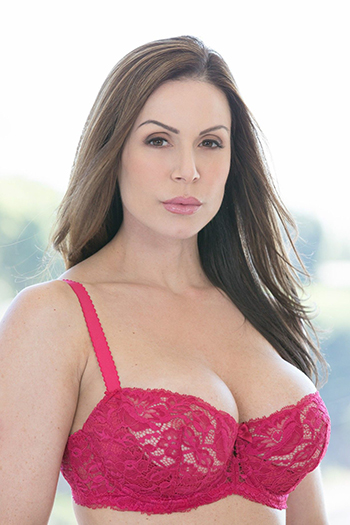

In [ ]:

# Open image
from keras.preprocessing import image
import PIL.Image as Image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/Train/Kendra_lust/s1_kendra_lust.jpg')  
img

In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/Colab Notebooks/Train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Test'

In [ ]:
# calling the model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
# For not letting train the layers again
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob(train_path+"/*")
print(len(folders))

5


In [ ]:
x = Flatten()(vgg.output) # It flatten the output coming from vgg.output, suppose 1000 output is coming so it set 1000 neurons for that
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers

adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # we are doing preprocess_input, coz when the actual vgg16 model was trained, there were some pre processing steps were used so in order to get similar 
    # result we use preprocessing
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
     rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1221 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 740 images belonging to 5 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10

Epoch 00001: val_loss improved from inf to 1.76646, saving model to mymodel.h5
5/5 - 393s - loss: 1.7899 - accuracy: 0.3187 - val_loss: 1.7665 - val_accuracy: 0.3243 - 393s/epoch - 79s/step
Epoch 2/10
5/5 - 39s - loss: 1.1856 - accuracy: 0.5750 - 39s/epoch - 8s/step
Epoch 3/10
5/5 - 35s - loss: 0.8804 - accuracy: 0.6562 - 35s/epoch - 7s/step
Epoch 4/10
5/5 - 26s - loss: 0.5809 - accuracy: 0.8188 - 26s/epoch - 5s/step
Epoch 5/10
5/5 - 24s - loss: 0.4484 - accuracy: 0.8625 - 24s/epoch - 5s/step
Epoch 6/10
5/5 - 22s - loss: 0.3840 - accuracy: 0.8625 - 22s/epoch - 4s/step
Epoch 7/10
5/5 - 20s - loss: 0.4428 - accuracy: 0.8500 - 20s/epoch - 4s/step
Epoch 8/10
5/5 - 15s - loss: 0.3372 - accuracy: 0.9000 - 15s/epoch - 3s/step
Epoch 9/10
5/5 - 16s - loss: 0.3314 - accuracy: 0.8875 - 16s/epoch - 3s/step
Epoch 10/10
5/5 - 12s - loss: 0.2211 - accuracy: 0.9312 - 12s/epoch - 2s/step
Training completed in time:  0:11:49.702232


In [ ]:
# For Prediction  
model_history

In [ ]:
import cv2 

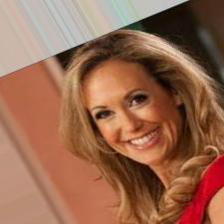

In [ ]:
# test_image = cv2.resize(cv2.imread(test_path + "/Kendra_lust/kendi1.jpg" ,cv2.IMREAD_GRAYSCALE),  (224,224)) 

tst = Image.open(train_path + "/Brandi_love/lbrand_0_3345.jpg").resize(IMAGE_SIZE)
tst

In [ ]:
tt=tst.resize(IMAGE_SIZE)
tt

test_image.shape

(224, 224)

In [ ]:
 # normalize the image in order to do classification
tt=np.array(tt)/255.0
tt.shape

(224, 224, 3)

In [ ]:
tst=tt[np.newaxis].shape
tst

(1, 224, 224, 3)

In [ ]:
result=model.predict(tt[np.newaxis])
result

array([[9.9618918e-01, 9.4839612e-05, 2.9860744e-03, 4.4317141e-05,
        6.8561942e-04]], dtype=float32)

In [ ]:
np.argmax(result)

0